<a href="https://colab.research.google.com/github/efitzgerald763/Blood_brain_models/blob/main/scRNAseq_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Connects to your Google Drive so you can import files
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd

counts_path = '/content/drive/My Drive/Colab Notebooks/Pseudobulked_MDD/filtered_counts_matrix.csv'
meta_path = '/content/drive/My Drive/Colab Notebooks/Pseudobulked_MDD/filtered_counts_matrix_METADATA.csv'

data = pd.read_csv(counts_path)
meta = pd.read_csv(meta_path)

# Set the index to the first column
data.set_index(data.columns[0], inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Randomly select 100 rows from the dataframe
random_sample = data.sample(n=100, random_state=42)  # random_state is set for reproducibility

# Display the sample
random_sample.head()

,F1,F10,F11,F12,F13,F14,F15,F16,F17,F2,...,F34,F35,F36,F37,F38,F4,F5,F6,F7,F8
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Excitatory neurons_MARVELD2,0.010517,0.020124,0.017928,0.004237,0.002427,0.012407,0.011765,0.013043,0.005547,0.003610,...,0.005333,0.006029,0.005376,0.008621,0.001770,0.011121,0.008349,0.000000,0.010811,0.007067
Astrocytes_C2orf27A,0.068182,0.023316,0.000000,0.059113,0.059172,0.108374,0.041152,0.000000,0.043760,0.060606,...,0.045161,0.012389,0.014184,0.016393,0.117647,0.049107,0.070140,0.222222,0.000000,0.028986
Inhibitory neurons_SHE,0.012800,0.017341,0.008961,0.016327,0.000000,0.010811,0.006024,0.018182,0.006742,0.000000,...,0.006349,0.007407,0.006652,0.009346,0.011952,0.000000,0.011986,0.046875,0.009804,0.007634
Oligodendrocytes_LINGO3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000670,0.000000,0.000534,0.000000,...,0.000000,0.001242,0.001453,0.000000,0.013699,0.001390,0.001549,0.000000,0.000000,0.005236
Endothelial_LPCAT1,0.081967,0.067416,0.145299,0.164557,0.181818,0.072289,0.087719,0.050000,0.051852,0.037037,...,0.103448,0.061224,0.103448,0.182796,0.185714,0.132530,0.040201,0.113636,0.142857,0.129630


In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models


# Normalize the data (important for neural networks)
random_sample_normalized = (random_sample - random_sample.min()) / (random_sample.max() - random_sample.min())

# Convert to numpy array
random_sample_normalized = random_sample_normalized.T
random_sample_array = random_sample_normalized.values

# Define dimensions for the autoencoder
input_dim = random_sample_array.shape[1]  # Number of features in your sampled data
print(input_dim)
encoding_dim = 3  # You can adjust this to your desired number of reduced dimensions

# Build the autoencoder model
input_layer = layers.Input(shape=(input_dim,))
encoder = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoder = layers.Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = models.Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(random_sample_array, random_sample_array, epochs=100, batch_size=10, shuffle=True, verbose=1)

# Extract the encoder model
encoder_model = models.Model(inputs=input_layer, outputs=encoder)

# Use the encoder to reduce the dimensions of your sample
reduced_data = encoder_model.predict(random_sample_array)

# The variable `reduced_data` now contains the data with reduced dimensions
print(reduced_data.shape)  # This should output (100, encoding_dim)


100
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2350
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2341 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2337 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2322 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2327 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2306 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2294 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2298 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2278 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2272 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2270 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2257 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2252 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2232 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2224 
Epoch 16/100
3/3

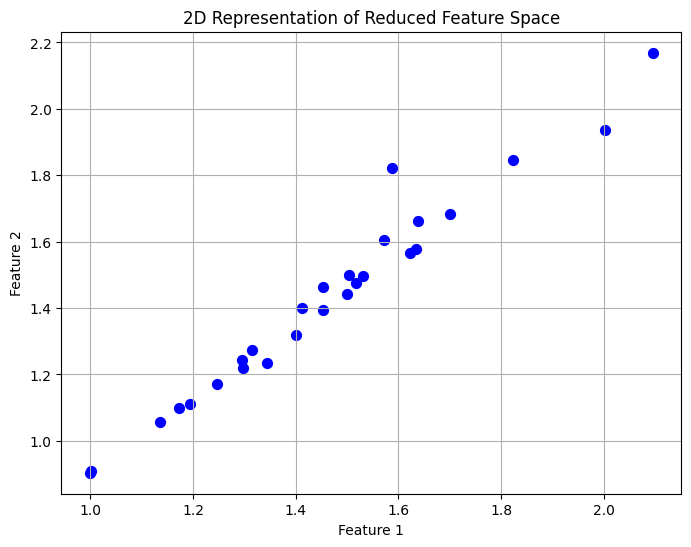

In [24]:
import matplotlib.pyplot as plt

# Assuming reduced_data has shape (100, 2) after reduction
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', s=50)
plt.title('2D Representation of Reduced Feature Space')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


In [25]:
# Extract the weights from the encoder layer
encoder_weights = encoder_model.layers[1].get_weights()[0]

# Display the shape of the weights (input_dim, encoding_dim)
print(f"Encoder weights shape: {encoder_weights.shape}")


Encoder weights shape: (100, 3)


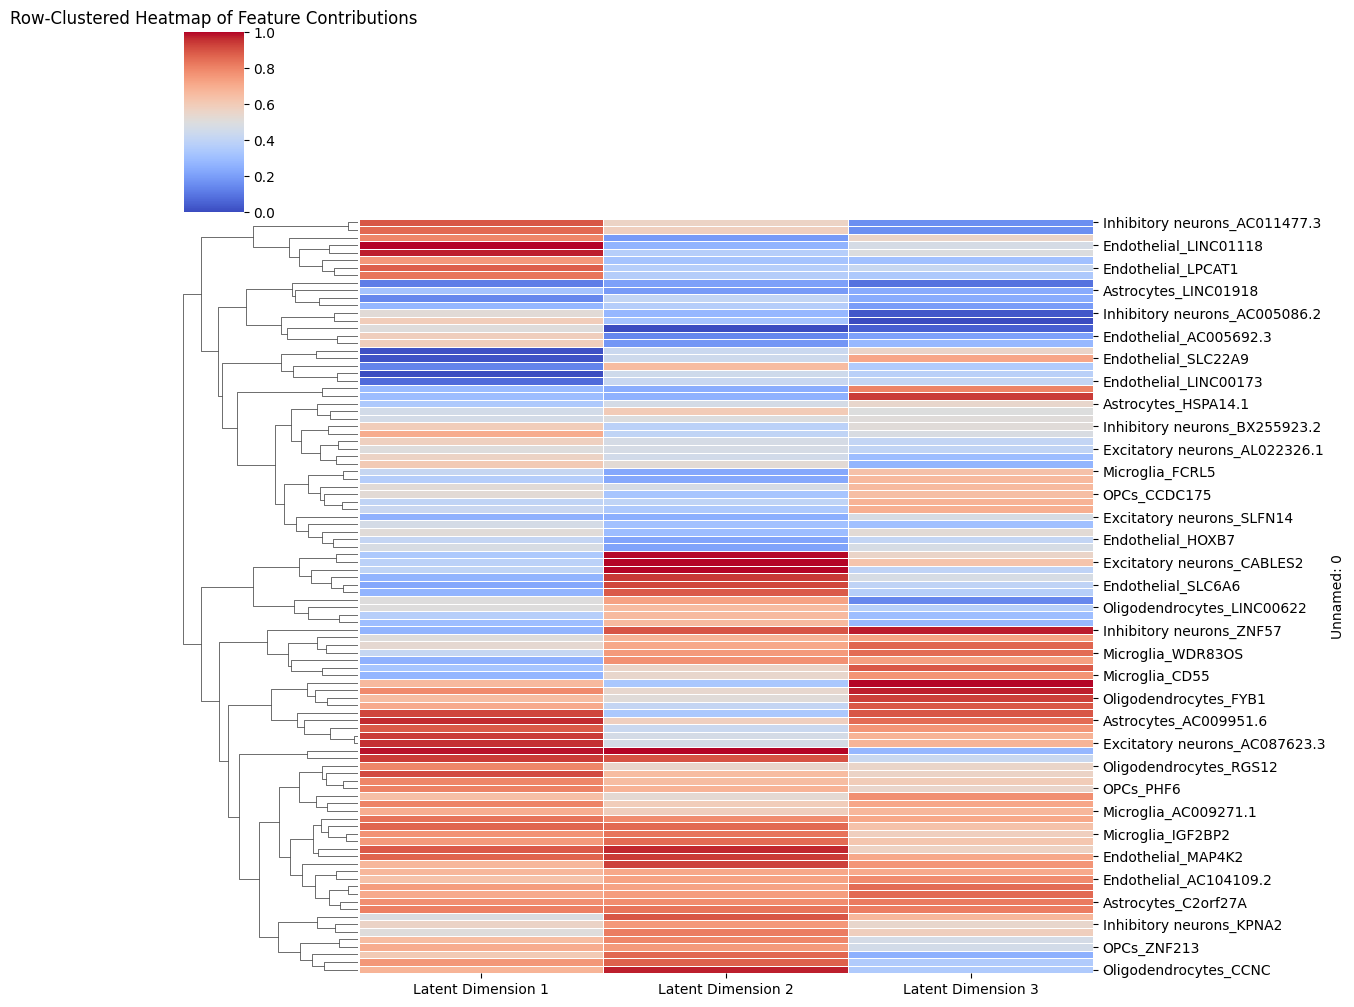

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the encoder weights to a DataFrame for easier visualization
encoder_weights_df = pd.DataFrame(encoder_weights,
                                  index=random_sample_normalized.columns,  # Original feature names
                                  columns=[f'Latent Dimension {i+1}' for i in range(encoder_weights.shape[1])])
sns.clustermap(encoder_weights_df,
               cmap='coolwarm',
               linewidths=0.5,
               figsize=(12, 10),
               metric='euclidean',
               method='average',
               row_cluster=True,  # Only cluster the rows (features)
               col_cluster=False, # Do not cluster columns (latent dimensions)
               standard_scale=1)
plt.title('Row-Clustered Heatmap of Feature Contributions')
plt.show()


In [31]:
# Encode the samples using the encoder
encoded_samples = encoder_model.predict(random_sample_normalized)

# Convert the encoded samples to a DataFrame for easier manipulation
encoded_samples_df = pd.DataFrame(encoded_samples,
                                  index=random_sample_normalized.index,  # Use the original sample names as index
                                  columns=[f'Latent Dimension {i+1}' for i in range(encoded_samples.shape[1])])

# Display the encoded sample DataFrame
encoded_samples_df.head()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


,Latent Dimension 1,Latent Dimension 2,Latent Dimension 3
F1,1.246980,1.171615,1.238563
F10,1.500484,1.441913,1.424676
F11,1.634691,1.576340,1.551924
F12,1.344632,1.235478,1.304926
F13,1.314658,1.272486,1.329326


In [35]:
# Ensure the meta dataframe has the same sample index
meta.set_index(meta.columns[0], inplace=True)

# Merge encoded samples with the meta data based on the sample index
merged_df = encoded_samples_df.merge(meta[['Condition']], left_index=True, right_index=True)

# Display the merged DataFrame
merged_df.head()


,Latent Dimension 1,Latent Dimension 2,Latent Dimension 3,Condition
F1,1.246980,1.171615,1.238563,Case
F10,1.500484,1.441913,1.424676,Control
F11,1.634691,1.576340,1.551924,Case
F12,1.344632,1.235478,1.304926,Case
F13,1.314658,1.272486,1.329326,Control


In [33]:
print(meta.columns)

Index(['Chemistry', 'Sequencing', 'Age', 'Race', 'Sex'], dtype='object')


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

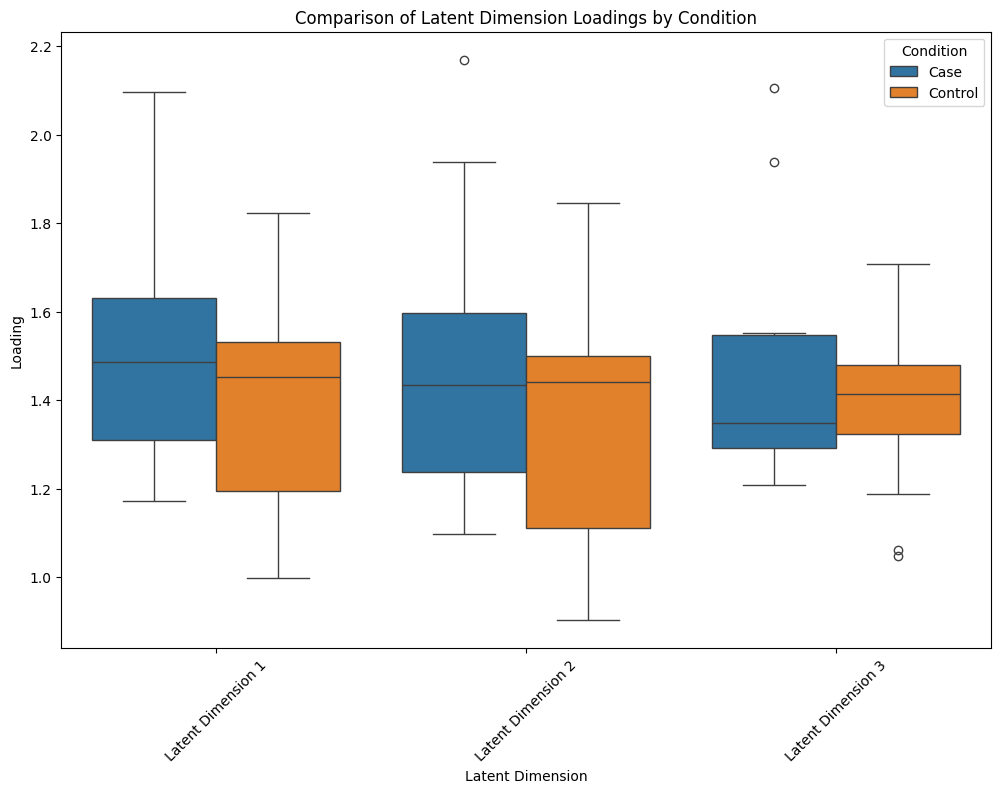

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to long format for easier plotting
melted_df = merged_df.melt(id_vars='Condition',
                           var_name='Latent Dimension',
                           value_name='Loading')

# Plot a boxplot to compare loadings across conditions
plt.figure(figsize=(12, 8))
sns.boxplot(x='Latent Dimension', y='Loading', hue='Condition', data=melted_df)
plt.title('Comparison of Latent Dimension Loadings by Condition')
plt.xticks(rotation=45)
plt.show()
